In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "F:\\school\\Azubi Africa\\LP1 Data Analytics Project\\LP-1-Project\\data\\Aba3_cleaned.csv"
df = pd.read_csv(file_path)

In [ ]:
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels.api as sa

# Data Cleaning
df = df.dropna(subset=['Amount in ($)'])
df = df[df['Amount in ($)'] != '']
df['Amount in ($)'] = pd.to_numeric(df['Amount in ($)'], errors='coerce')

# Handling infinite values and NaNs after conversion
df = df[~df.isin([float('inf'), float('-inf')])].dropna()

#Remove outliers
Q1 = df['Amount in ($)'].quantile(0.25)
Q3 = df['Amount in ($)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['Amount in ($)'] >= lower_bound) & (df['Amount in ($)'] <= upper_bound)]

# Perform ANOVA test
formula = 'Amount in ($) ~ C(Industry In)'
lm = sm.ols(formula, data=df_no_outliers).fit()
anova_table = sa.stats.anova_lm(lm, typ=2)

print(anova_table)

# Interpretation:
# Look at the p-value in the ANOVA table.
# - If the p-value is less than your significance level (e.g., 0.05), you reject the null hypothesis. This suggests that there are statistically significant differences in average funding amounts across different industries.
# - If the p-value is greater than your significance level, you fail to reject the null hypothesis.  This suggests that there isn't enough evidence to conclude that the average funding amounts differ significantly across industries.


                   sum_sq     df        F    PR(>F)
C(Industry)  1.567432e+16  274.0  1.20215  0.032848
Residual     3.078816e+16  647.0      NaN       NaN


Top 10 Industries by Average Funding:
Industry
Innovation Management     1.000000e+09
Home services             2.500000e+08
Cloud kitchen             1.750000e+08
E-market                  1.680000e+08
Social media              1.530000e+08
D2C Business              1.500000e+08
Crypto                    1.307500e+08
Health and Fitness        1.150000e+08
Finance                   1.012964e+08
Automotive and Rentals    1.012500e+08
Name: Amount, dtype: float64


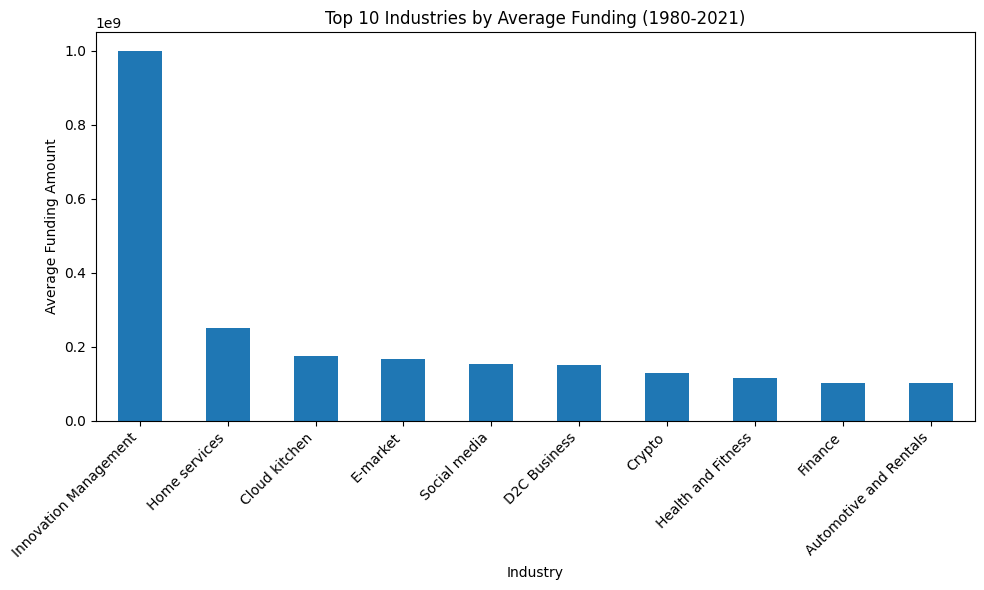

In [ ]:
# Calculate average funding per industry
avg_funding_per_industry = df.groupby('Industry In')['Amount in ($)'].mean().sort_values(ascending=False)

print("Top 10 Industries by Average Funding:")
print(avg_funding_per_industry.head(10))

# Visualization (optional)
avg_funding_per_industry.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Industries by Average Funding (1980-2021)')
plt.xlabel('Industry In')
plt.ylabel('Average Funding Amount in ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Median Funding by Round Series:
RoundSeries
Series H                 270000000.0
Series G                 266000000.0
Series F                 115000000.0
PE                       100000000.0
Series E                 100000000.0
Series I                  76000000.0
Series D                  65000000.0
Series C                  37500000.0
Series E2                 26500000.0
Series D1                 23483500.0
Pre-series C              22000000.0
Series B                  20000000.0
Series A2                 15000000.0
Series B3                 14300000.0
Series B2                 11000000.0
Series A+                  8500000.0
Pre-Series B               8000000.0
Pre-series                 8000000.0
Series F1                  7000000.0
Pre series B               6641000.0
Debt                       6000000.0
Series A                   6000000.0
Edge                       5040000.0
Series F2                  5000000.0
Pre-series B               3500000.0
Pre- series A              340

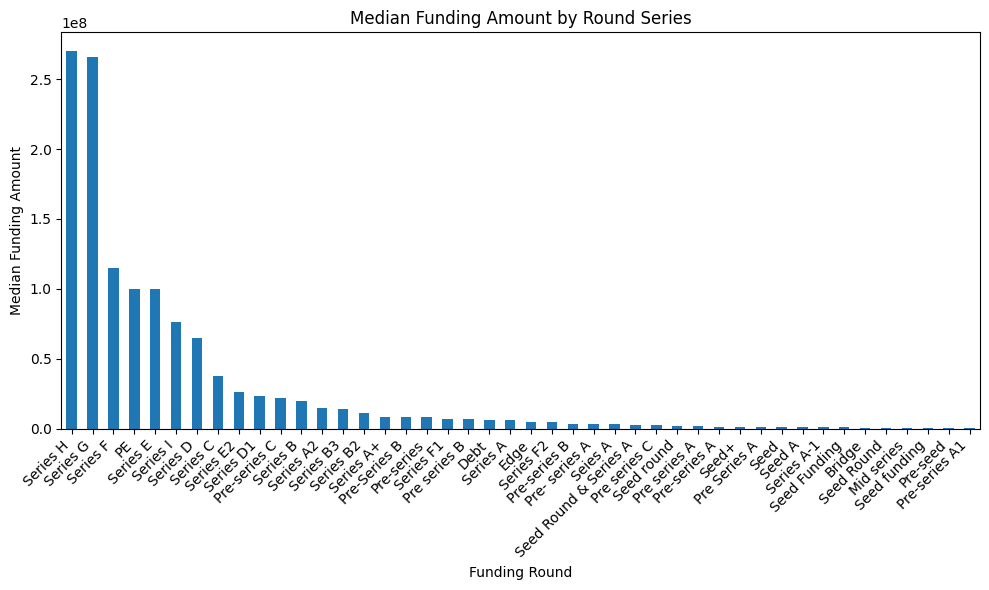

In [ ]:
# Calculate median funding amount for each round
median_funding_per_round = df.groupby('Funding Round/Series')['Amount in ($)'].median().sort_values(ascending=False)

print("\nMedian Funding by  Funding Round/Series:")
print(median_funding_per_round)

# Visualization
median_funding_per_round.plot(kind='bar', figsize=(10, 6))
plt.title('Median Funding Amount in ($) by Round Series')
plt.xlabel('Funding Round/Series')
plt.ylabel('Median Funding Amount in ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Interpretation:
# The higher the round series the higher the funding amount


In [ ]:
# Filter data for the relevant years
funding_2018 = df[df['Year Founded'] == 2018]['Amount in ($)']
funding_2019 = df[df['Year Founded'] == 2019]['Amount in ($)']
funding_2020 = df[df['Year Founded'] == 2020]['Amount in ($)']

# Calculate summary statistics (mean, median)
print("\nFunding in 2018:")
print(f"  Mean: {funding_2018.mean():.2f}, Median: {funding_2018.median():.2f}")
print("\nFunding in 2019:")
print(f"  Mean: {funding_2019.mean():.2f}, Median: {funding_2019.median():.2f}")
print("\nFunding in 2020:")
print(f"  Mean: {funding_2020.mean():.2f}, Median: {funding_2020.median():.2f}")

# Perform statistical test (e.g., t-test or Mann-Whitney U test if data is not normally distributed)
# Example: Mann-Whitney U test for 2019 vs. 2020
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(funding_2019, funding_2020)
print(f"\nMann-Whitney U test (2019 vs 2020): statistic={stat:.3f}, p-value={p:.3f}")

# Interpretation:
# Compare the mean and median funding amounts for each year.  Also, examine the p-value from the Mann-Whitney U test (or t-test). A p-value less than 0.05 suggests a statistically significant difference in funding amounts between the years.



Funding in 2018:
  Mean: 20131521.50, Median: 2500000.00

Funding in 2019:
  Mean: 7661524.69, Median: 2000000.00

Funding in 2020:
  Mean: 6713417.58, Median: 1800000.00

Mann-Whitney U test (2019 vs 2020): statistic=15391.000, p-value=0.481


In [ ]:
# Calculate average funding per industry for pre-pandemic (2018-2019)
pre_pandemic = df[(df['Year Founded'] == 2018) | (df['Year Founded'] == 2019)].groupby('Industry In')['Amount in ($)'].mean()

# Calculate average funding per industry during the pandemic (2020)
pandemic = df[df['Year Founded'] == 2020].groupby('Industry In')['Amount in ($)'].mean()

# Calculate the percentage change in funding
funding_change = ((pandemic - pre_pandemic) / pre_pandemic) * 100
funding_change = funding_change.sort_values(ascending=False)

print("\nIndustries with Significant Funding Changes (Pre-Pandemic vs. Pandemic):")
print(funding_change)

# Identify thriving and struggling sectors
thriving_sectors = funding_change[funding_change > 0].index.tolist()
struggling_sectors = funding_change[funding_change < 0].index.tolist()

print("\nThriving Sectors:", thriving_sectors)
print("Struggling Sectors:", struggling_sectors)



Industries with Significant Funding Changes (Pre-Pandemic vs. Pandemic):
Industry
E-learning             6131.003040
Apparel & Fashion      3900.000000
AI startup              946.511628
Retail                  598.412698
Cosmetics               558.823529
                          ...     
Veterinary                     NaN
Video communication            NaN
WL & RAC protection            NaN
Wholesale                      NaN
sports                         NaN
Name: Amount, Length: 166, dtype: float64

Thriving Sectors: ['E-learning', 'Apparel & Fashion', 'AI startup', 'Retail', 'Cosmetics', 'Insurance', 'Edtech', 'Media', 'Deeptech', 'EdTech', 'Fashion', 'Computer Software', 'Computer software', 'Insuretech', 'Food & Beverages', 'Information Technology', 'Healthcare']
Struggling Sectors: ['AgriTech', 'Fintech', 'Consumer Goods', 'Tech Startup', 'Financial Services', 'Blockchain startup', 'Information Technology & Services', 'EV startup', 'Automotive', 'Construction', 'IT startup', 

In [ ]:
# Calculate average funding per location
avg_funding_per_location = df.groupby('Head Quarter')['Amount in ($)'].mean().sort_values(ascending=False)

print("\nLocations with Highest Average Funding:")
print(avg_funding_per_location)

# You can further analyze this by combining location with other factors (e.g., industry)



Locations with Highest Average Funding:
Head_Quarter
Berlin                                            170000000.0
San Ramon, California                             150000000.0
Information Technology & Services                  75000000.0
San Francisco Bay Area, West Coast, Western US     55000000.0
Haryana                                            38050000.0
                                                     ...     
Cochin                                               200000.0
Gandhinagar                                          200000.0
The Nilgiris                                         200000.0
Ranchi                                               100000.0
Surat                                                100000.0
Name: Amount, Length: 66, dtype: float64


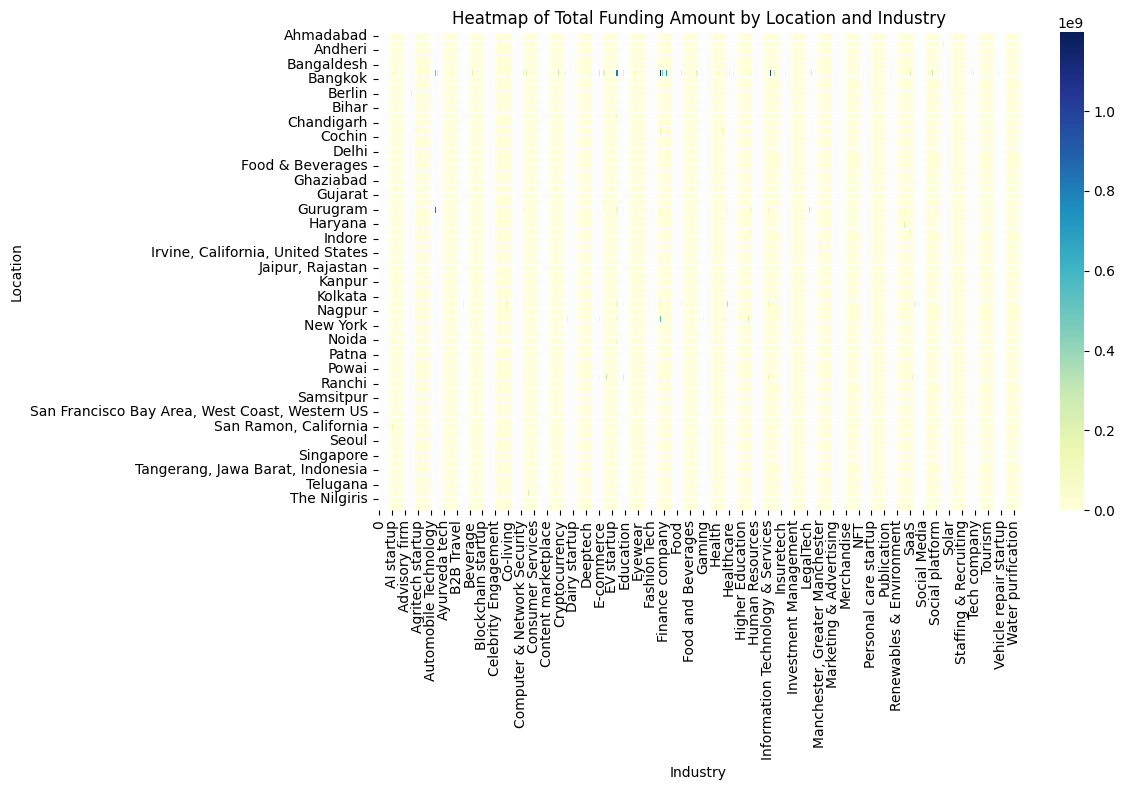

In [ ]:
# Create a pivot table
pivot_table = df.pivot_table(values='Amount in ($)', index='Head Quarter', columns='Industry In', aggfunc='sum', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Total Funding Amount in ($) by Location and Industry In')
plt.xlabel('Industry')
plt.ylabel('Head Quarter')
plt.tight_layout()
plt.show()


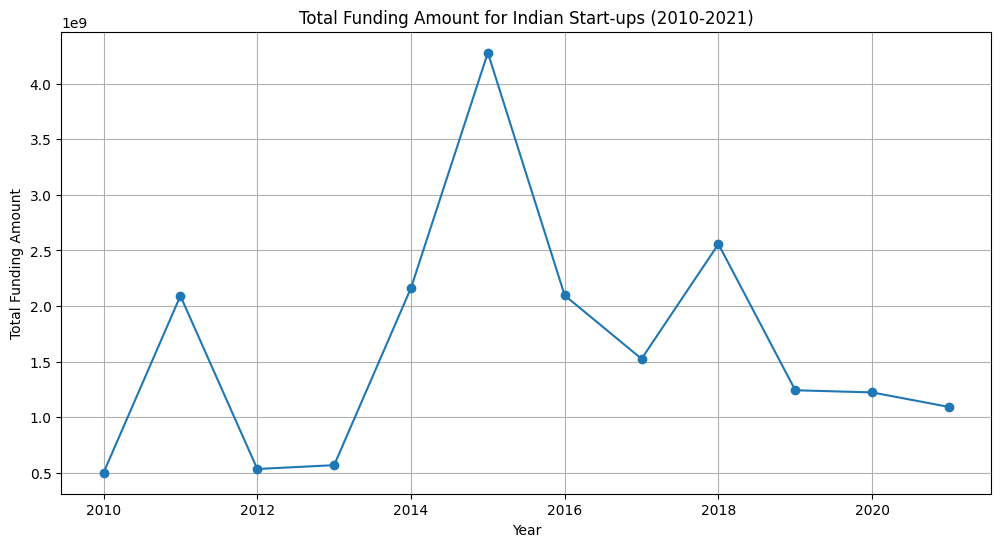

Percentage change in funding from 2019 to 2020: -1.56%


In [ ]:
# Filter the data for the years 2010 to 2021
df_2010_2021 = df[(df['Year Founded'] >= 2010) & (df['Year Founded'] <= 2021)]

# Group by year and calculate the total funding amount for each year
yearly_funding = df_2010_2021.groupby('Year Founded')['Amount in ($)'].sum()

# Plot the yearly funding trends
plt.figure(figsize=(12, 6))
yearly_funding.plot(kind='line', marker='o')
plt.title('Total Funding Amount in ($) for Indian Start-ups (2010-2021)')
plt.xlabel('Year Founded')
plt.ylabel('Total Funding Amount')
plt.grid(True)
plt.show()

# Calculate the percentage change in funding from 2019 to 2020
funding_2019 = yearly_funding.loc[2019] if 2019 in yearly_funding.index else 0
funding_2020 = yearly_funding.loc[2020] if 2020 in yearly_funding.index else 0

if funding_2019 != 0:
    percentage_change = ((funding_2020 - funding_2019) / funding_2019) * 100
    print(f"Percentage change in funding from 2019 to 2020: {percentage_change:.2f}%")
else:
    print("Funding data for 2019 is not available.")
